In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pulsar-classification-for-class-prediction/Pulsar.csv
/kaggle/input/playground-series-s3e10/sample_submission.csv
/kaggle/input/playground-series-s3e10/train.csv
/kaggle/input/playground-series-s3e10/test.csv


In [ ]:
!pip install openTSNE

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 44.9 MB/s eta 0:00:00a 0:00:01


In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from openTSNE import TSNE
from sklearn.decomposition import PCA

from imblearn.under_sampling import AllKNN
from sklearn.cluster import DBSCAN
from sklearn.metrics import pairwise_distances

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,StratifiedKFold
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost.callback import EarlyStopping
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, RocCurveDisplay, log_loss
from sklearn.metrics import roc_curve, precision_recall_curve, auc

# **EDA**

**The Data**

Mean_Integrated: Mean of Observations

SD: Standard deviation of Observations

EK: Excess kurtosis of Observations

Skewness: In probability theory and statistics, skewness is a measure of the asymmetry of the probability distribution of a real-valued random variable about its mean. Skewness of Observations.

Mean DMSNR Curve: Mean of DM SNR CURVE of Observations

SD DMSNR Curve: Standard deviation of DM SNR CURVE of Observations

EK DMSNR Curve: Excess kurtosis of DM SNR CURVE of Observations

Skewness DMSNR Curve: Skewness of DM SNR CURVE of Observations

Class: Class 0 - 1

**What IS DM SNR CURVE:**
Radio waves emitted from pulsars reach earth after traveling long distances in space which is filled with free electrons. The important point is that pulsars emit a wide range of frequencies, and the amount by which the electrons slow down the wave depends on the frequency. Waves with higher frequency are sowed down less as compared to waves with higher frequency. It means dispersion.

In [ ]:
df = pd.read_csv("/kaggle/input/pulsar-classification-for-class-prediction/Pulsar.csv")

In [ ]:
df.head()

Mean_Integrated         SD        EK  Skewness  Mean_DMSNR_Curve  \
0       140.562500  55.683782 -0.234571 -0.699648          3.199833   
1       102.507812  58.882430  0.465318 -0.515088          1.677258   
2       103.015625  39.341649  0.323328  1.051164          3.121237   
3       136.750000  57.178449 -0.068415 -0.636238          3.642977   
4        88.726562  40.672225  0.600866  1.123492          1.178930   

   SD_DMSNR_Curve  EK_DMSNR_Curve  Skewness_DMSNR_Curve  Class  
0       19.110426        7.975532             74.242225      0  
1       14.860146       10.576487            127.393580      0  
2       21.744669        7.735822             63.171909      0  
3       20.959280        6.896499             53.593661      0  
4       11.468720       14.269573            252.567306      0

In [ ]:
df.describe()

Mean_Integrated            SD            EK      Skewness  \
count     17898.000000  17898.000000  17898.000000  17898.000000   
mean        111.079968     46.549532      0.477857      1.770279   
std          25.652935      6.843189      1.064040      6.167913   
min           5.812500     24.772042     -1.876011     -1.791886   
25%         100.929688     42.376018      0.027098     -0.188572   
50%         115.078125     46.947479      0.223240      0.198710   
75%         127.085938     51.023202      0.473325      0.927783   
max         192.617188     98.778911      8.069522     68.101622   

       Mean_DMSNR_Curve  SD_DMSNR_Curve  EK_DMSNR_Curve  Skewness_DMSNR_Curve  \
count      17898.000000    17898.000000    17898.000000          17898.000000   
mean          12.614400       26.326515        8.303556            104.857709   
std           29.472897       19.470572        4.506092            106.514540   
min            0.213211        7.370432       -3.139270             -1.976976   
25%            1.923077       14.437332        5.781506             34.960504   
50%            2.801839       18.461316        8.433515             83.064556   
75%            5.464256       28.428104       10.702959            139.309330   
max          223.392141      110.642211       34.539844           1191.000837   

              Class  
count  17898.000000  
mean       0.091574  
std        0.288432  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Mean_Integrated       17898 non-null  float64
 1   SD                    17898 non-null  float64
 2   EK                    17898 non-null  float64
 3   Skewness              17898 non-null  float64
 4   Mean_DMSNR_Curve      17898 non-null  float64
 5   SD_DMSNR_Curve        17898 non-null  float64
 6   EK_DMSNR_Curve        17898 non-null  float64
 7   Skewness_DMSNR_Curve  17898 non-null  float64
 8   Class                 17898 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


<Axes: >

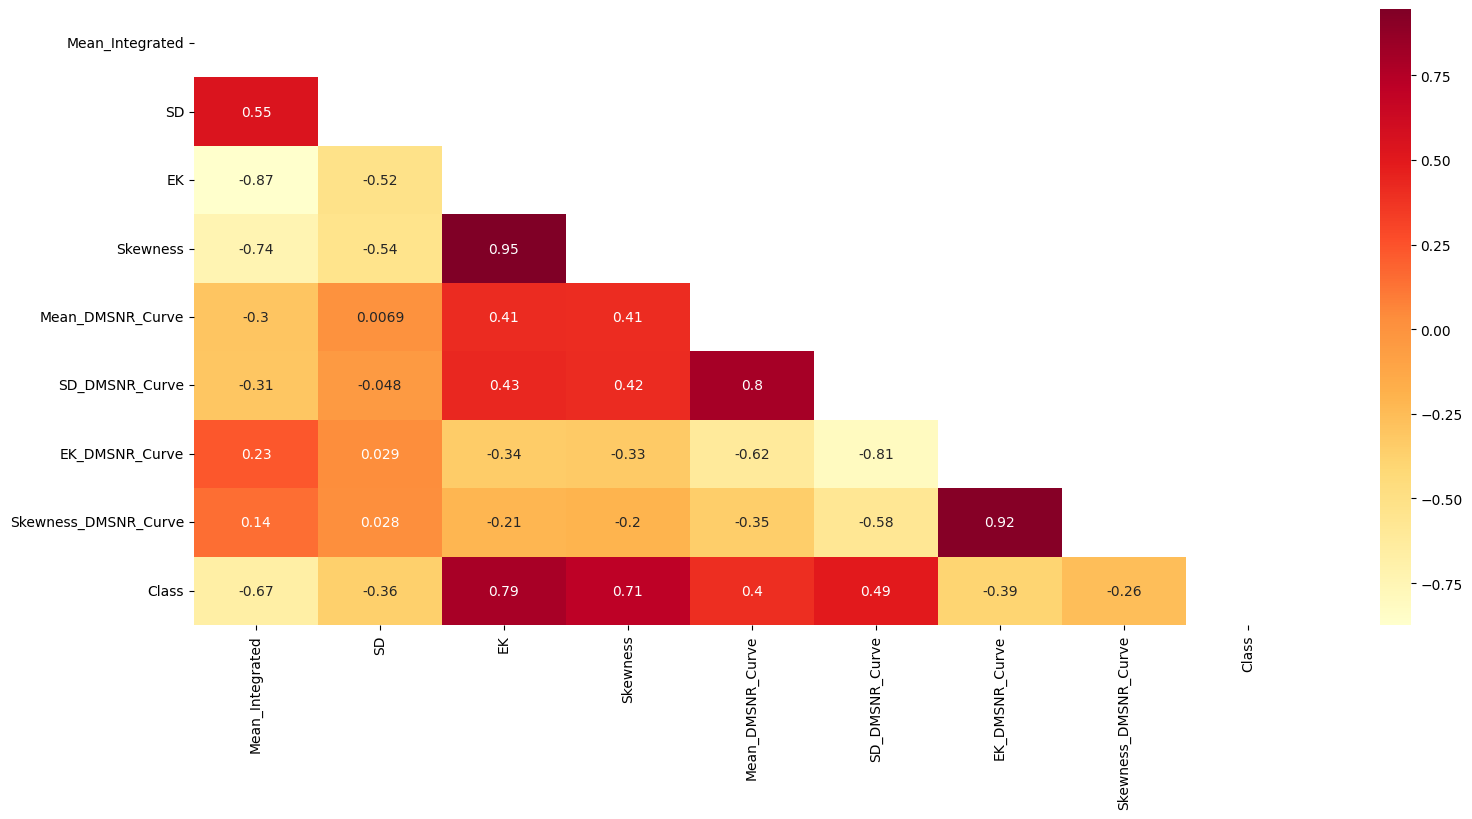

In [ ]:
plt.figure(figsize=(18, 8))
mask = np.triu(np.ones_like(df.corr()))
sns.heatmap(df.corr(),cmap='YlOrRd',annot=True,mask=mask)

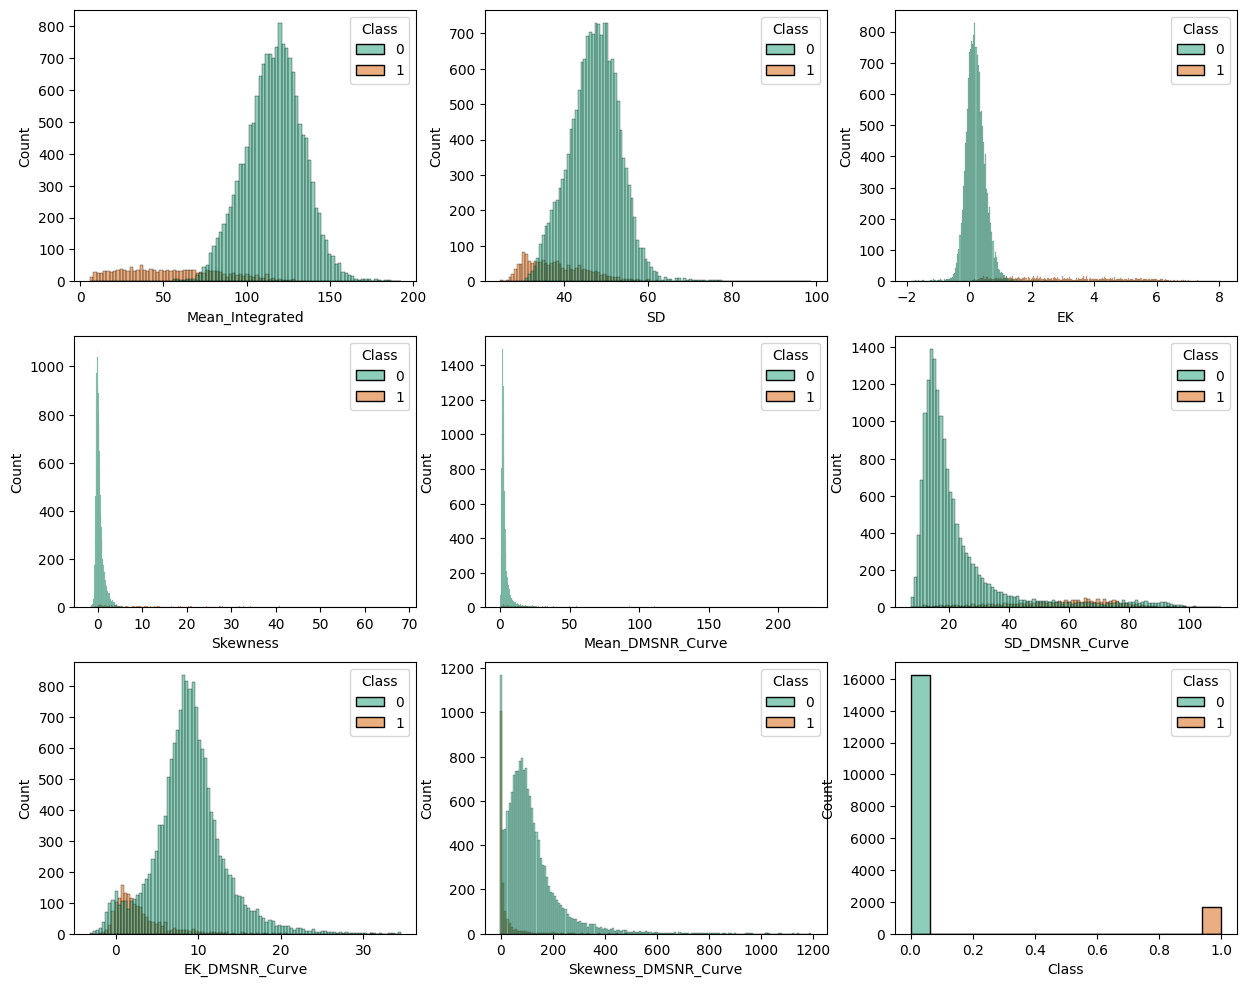

In [ ]:
fig, axes = plt.subplots(3,3,figsize=(15,12))
for i, j in zip(df.columns,axes.flatten()):
    sns.histplot(data=df,x=df[i],hue='Class',ax=j,palette='Dark2',alpha=0.5)
plt.show()

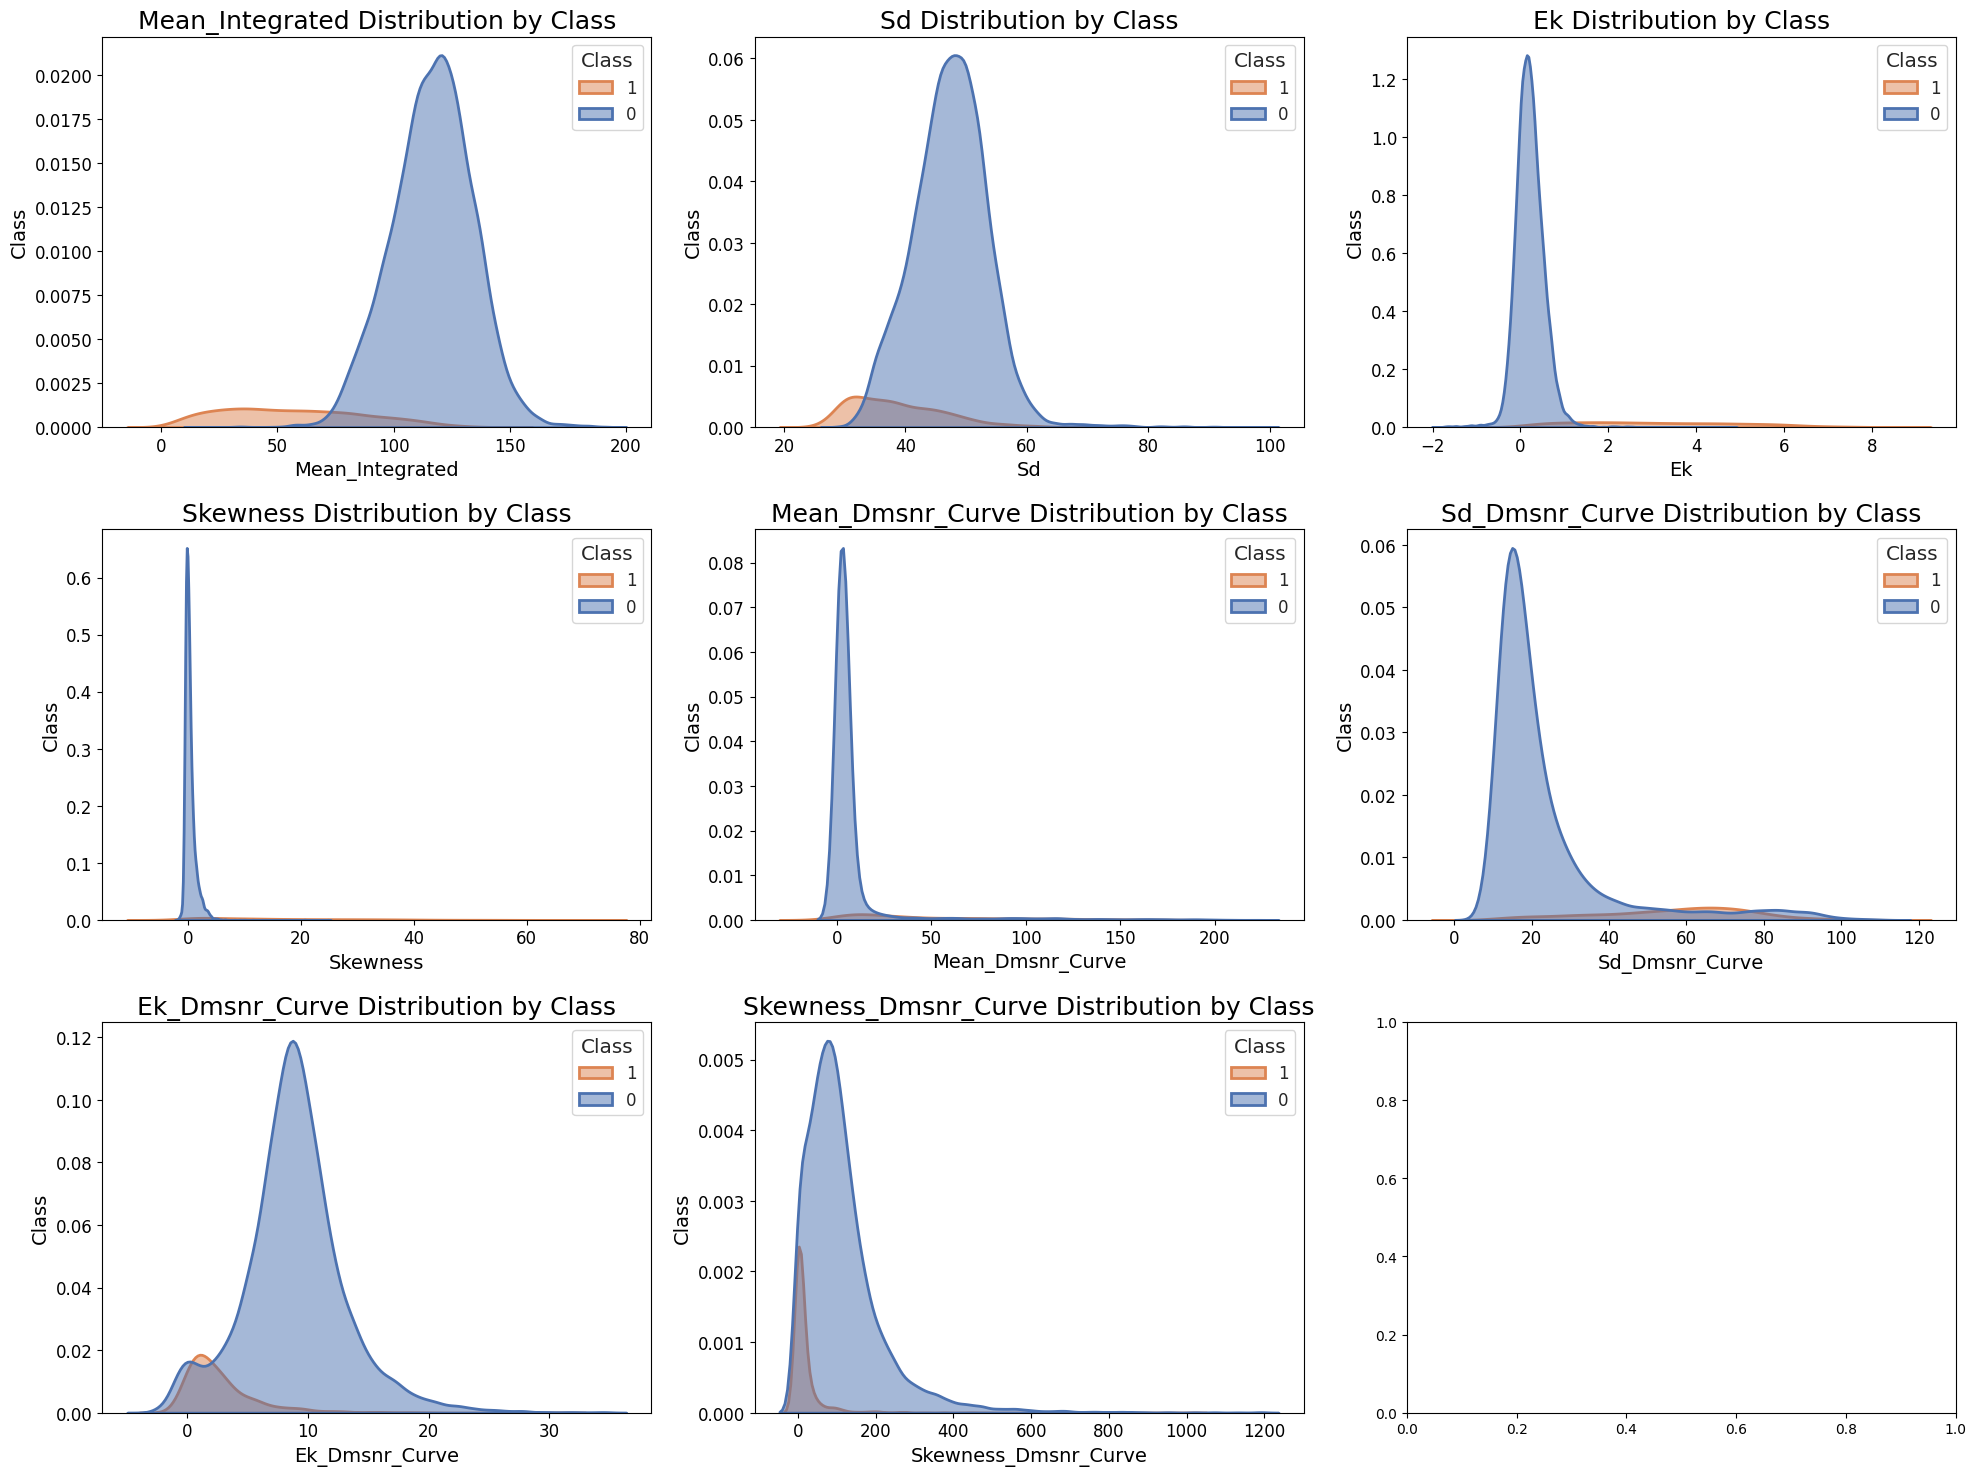

In [ ]:
target_col = 'Class'
num_cols = 3
num_rows = (len(df.columns) - 1) // num_cols + 1
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, 5*num_rows))
sns.set(font_scale=1.2, style='whitegrid')

for i, col_name in enumerate(df.columns):
    if col_name != target_col:
        ax = axes[i // num_cols, i % num_cols]
        sns.kdeplot(data=df, x=col_name, hue=target_col, ax=ax, fill=True, alpha=0.5, linewidth=2)
        # sns.kdeplot(data=original, x=col_name, hue=target_col, ax=ax, fill=True, alpha=0.5, linewidth=2)

        ax.set_title(f'{col_name.title()} Distribution by {target_col.title()}', fontsize=18)
        ax.set_xlabel(col_name.title(), fontsize=14)
        ax.set_ylabel(target_col.title(), fontsize=14)
        ax.tick_params(axis='both', which='major', labelsize=12)
        ax.legend([1, 0], title=target_col.title(), fontsize=12)

plt.tight_layout()
plt.show()

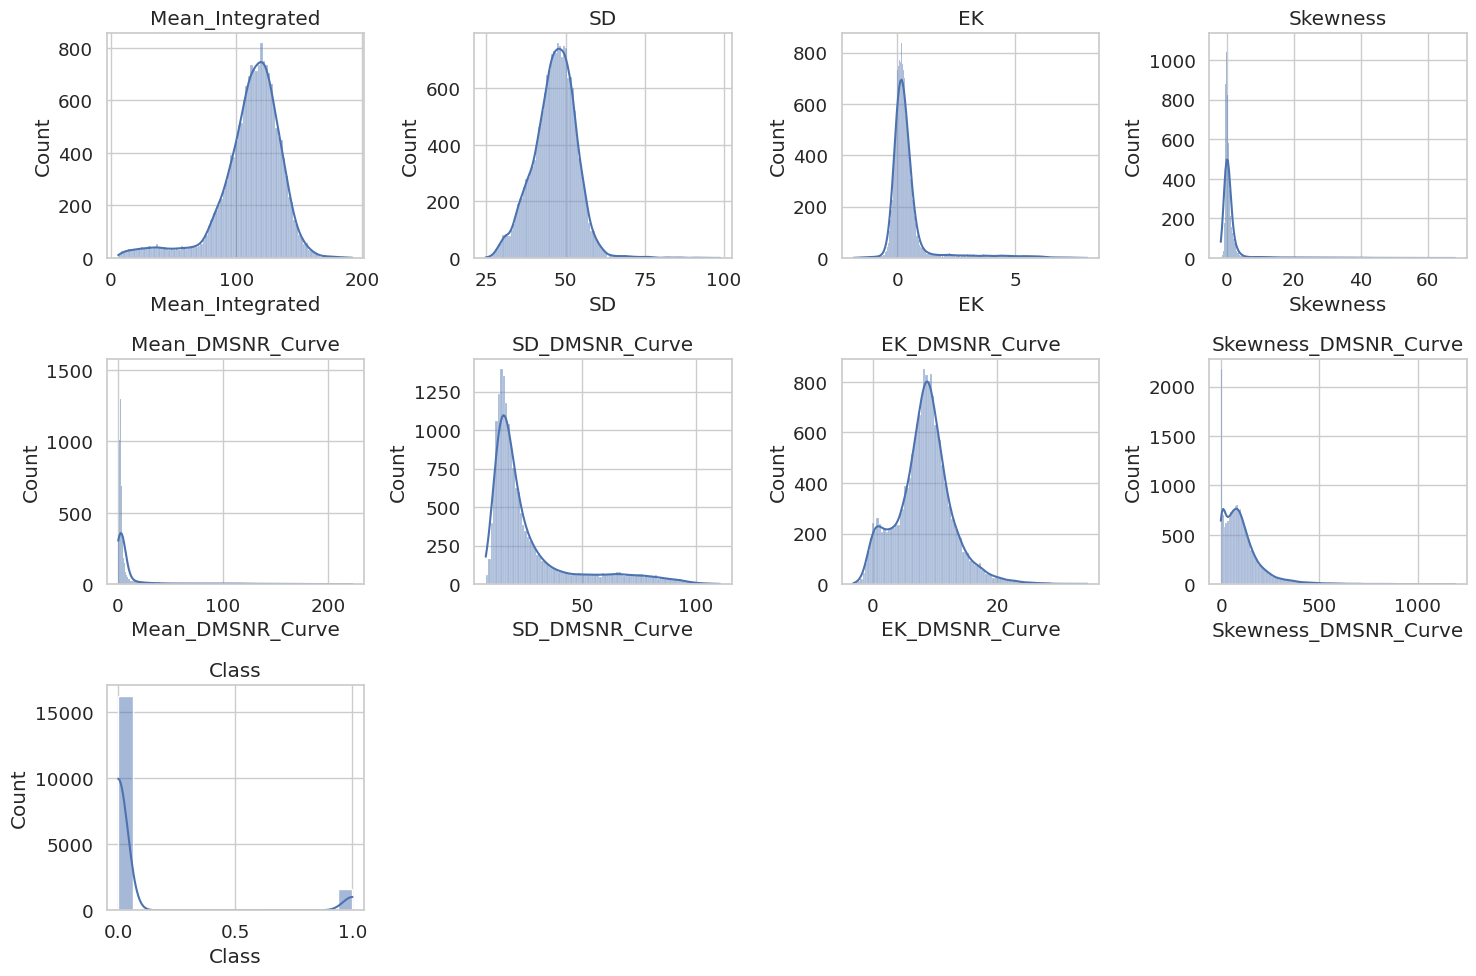

In [ ]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(df.columns):
    plt.subplot(3, 4, i+1)
    sns.histplot(df[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

<Axes: xlabel='SD', ylabel='Mean_Integrated'>

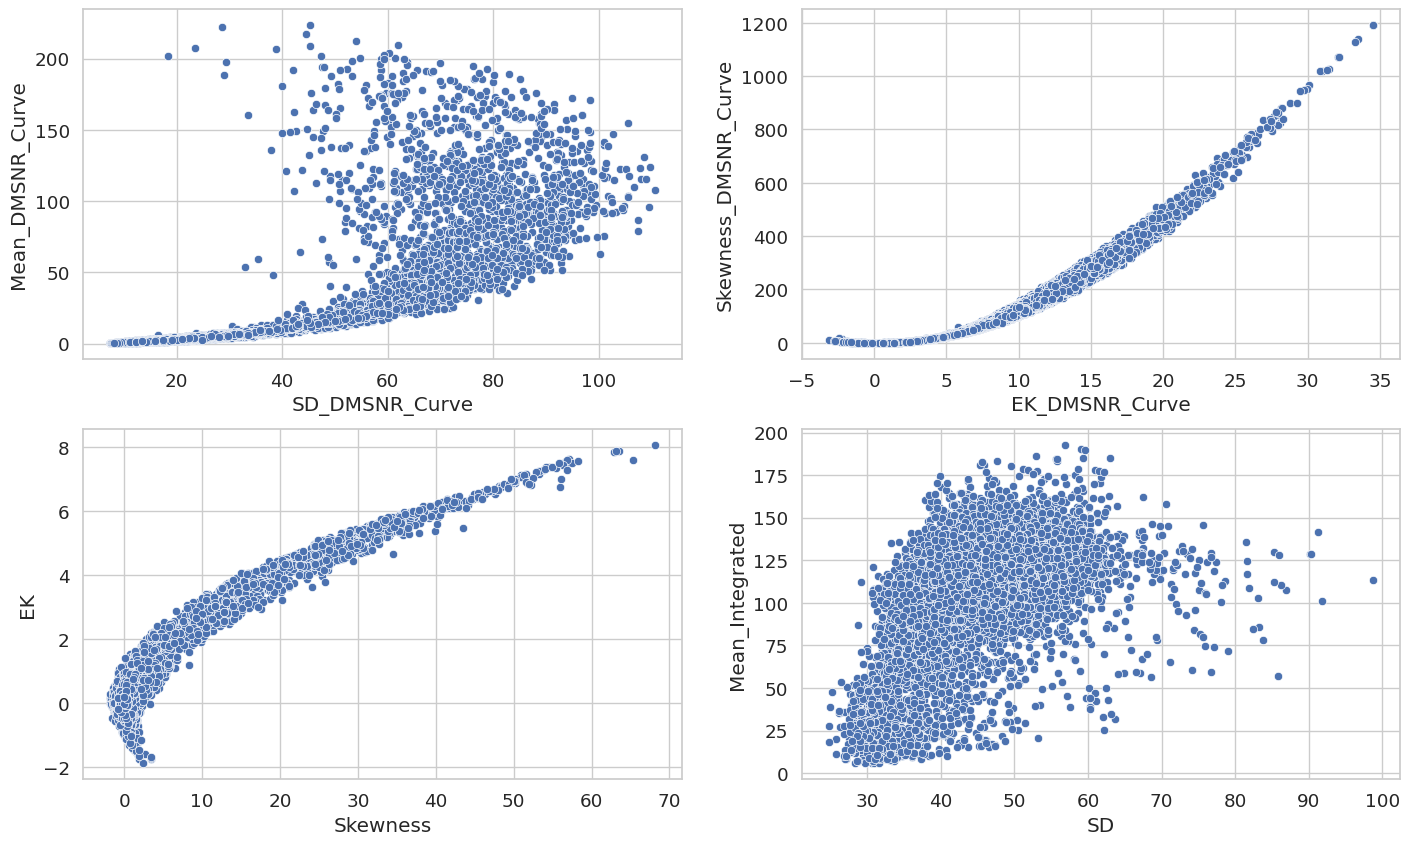

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(17, 10))

sns.scatterplot(ax=ax[0,0], data=df, x='SD_DMSNR_Curve',y='Mean_DMSNR_Curve')
sns.scatterplot(ax=ax[0,1], data=df, x='EK_DMSNR_Curve',y='Skewness_DMSNR_Curve')
sns.scatterplot(ax=ax[1,0], data=df, x= 'Skewness',y='EK')
sns.scatterplot(ax=ax[1,1], data=df, x='SD',y='Mean_Integrated')

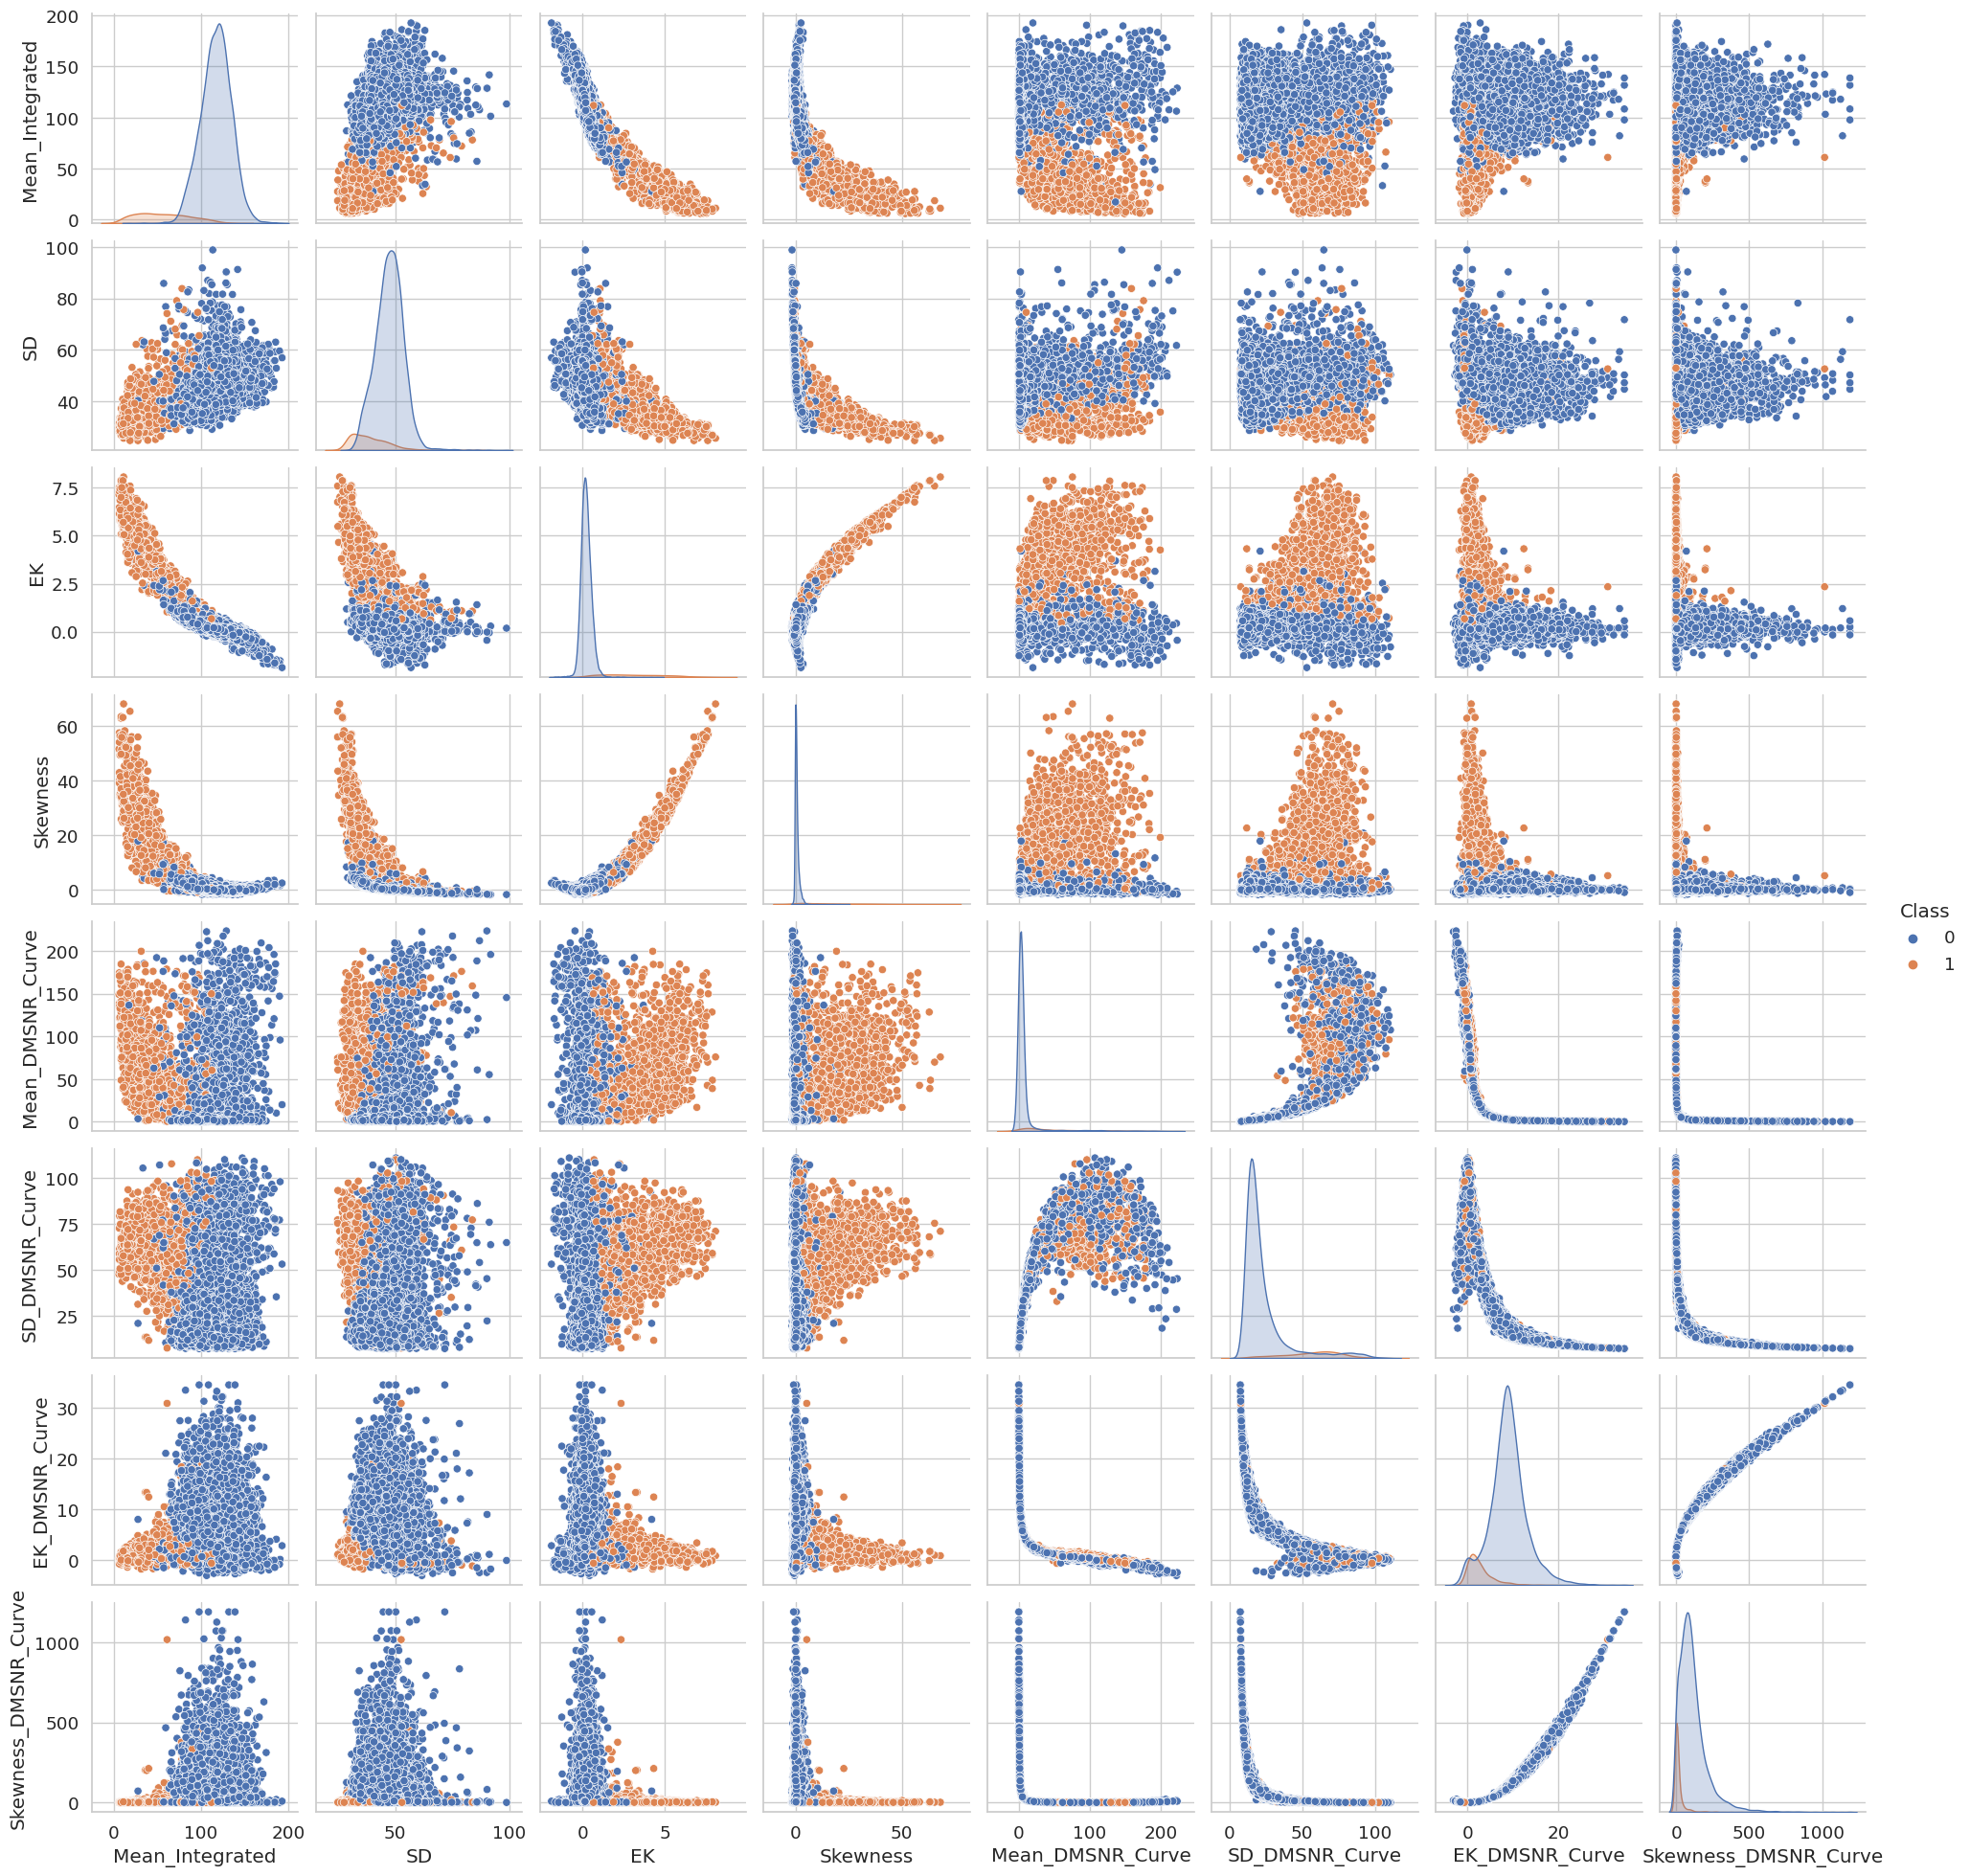

In [ ]:
sns.pairplot(data=df,hue='Class')

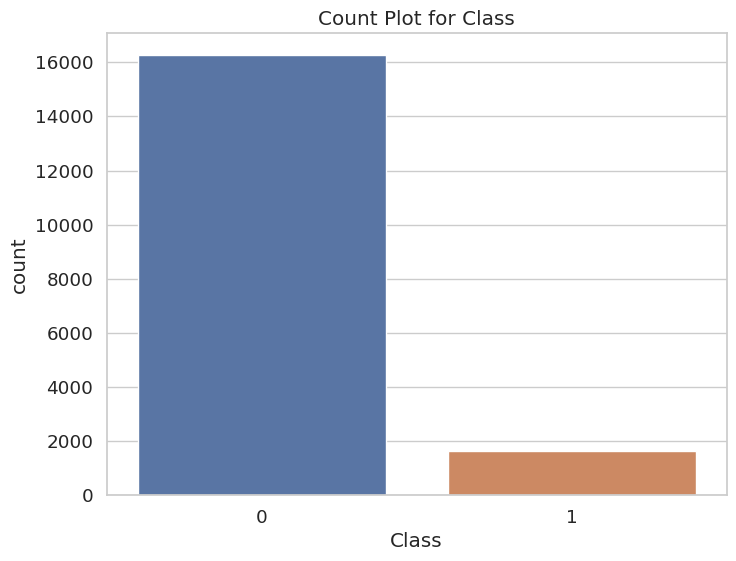

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Class')
plt.title('Count Plot for Class')
plt.show()

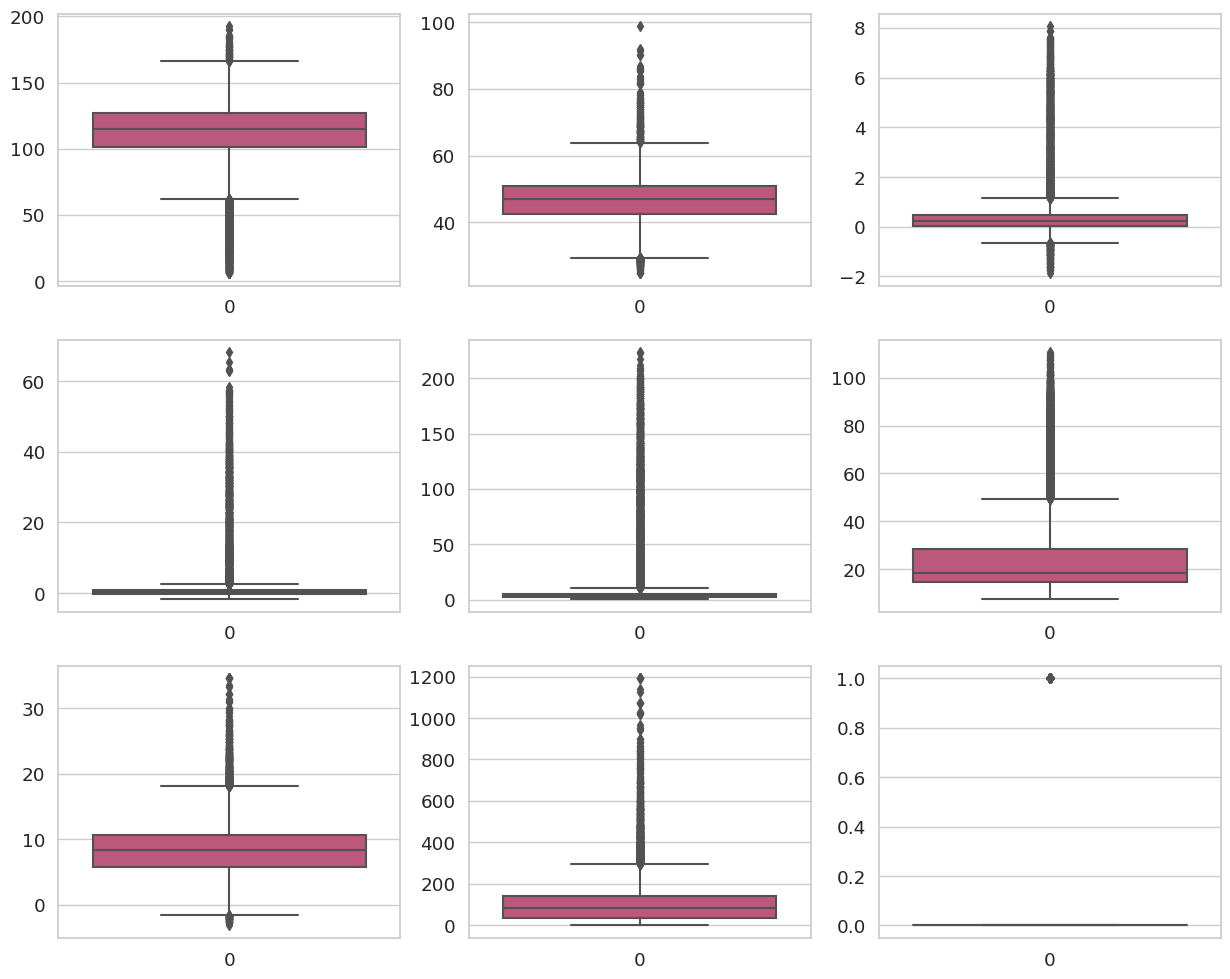

In [ ]:
fig, axes = plt.subplots(3,3, figsize=(15,12))
for i, j in zip(df.columns,axes.flatten()):
    sns.boxplot(data = df[i],ax=j,palette='plasma')
plt.show()

In [ ]:
def remove_outlier(df):
    outliers = df[
        (df['Class']==1)&
        (df['Mean_Integrated']>115)&
        (df['SD']>45)&
        (df['EK']<0.03)&
        (df['Skewness']<1)&
        (df['Mean_DMSNR_Curve']<20)
    ].index
    df.drop(outliers,inplace=True)
    df.reset_index()
    return df
df = remove_outlier(df)

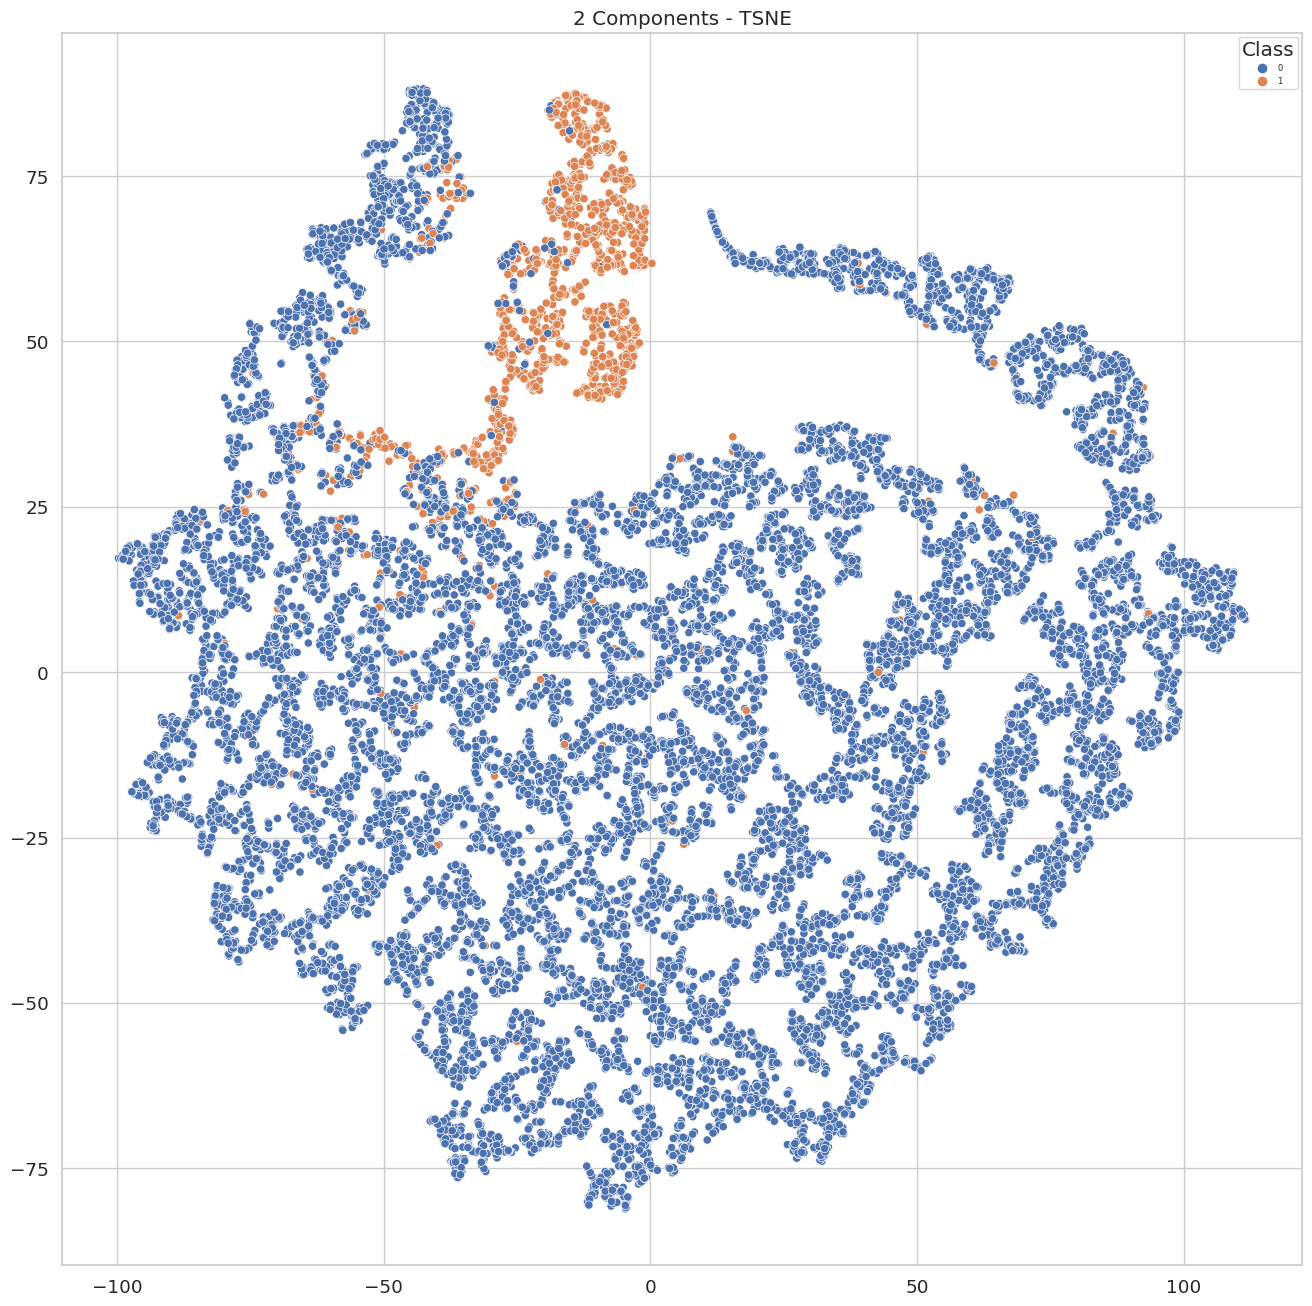

In [ ]:
target = df['Class']
tsne = TSNE()
train_tsne = tsne.fit(df.to_numpy())
fig, ax = plt.subplots(figsize=(16, 16))
sns.scatterplot(x=train_tsne[:, 0], y=train_tsne[:, 1], hue=target, ax=ax)
ax.legend(fontsize=6, title='Class')
ax.set_title('2 Components - TSNE');

**TSNE plots shows that classes are easily separable which means that we should expect a really high accuracy**

In [ ]:
# n = 2
pca = PCA(2)
ss = StandardScaler()

X = df.drop('Class', axis = 1)
X_ss = pd.DataFrame(ss.fit_transform(X))
X_pca = pca.fit_transform(X_ss)
pca2 = pd.DataFrame({"PCA1": X_pca[:, 0], "PCA2": X_pca[:, 1], "Class": df["Class"]})

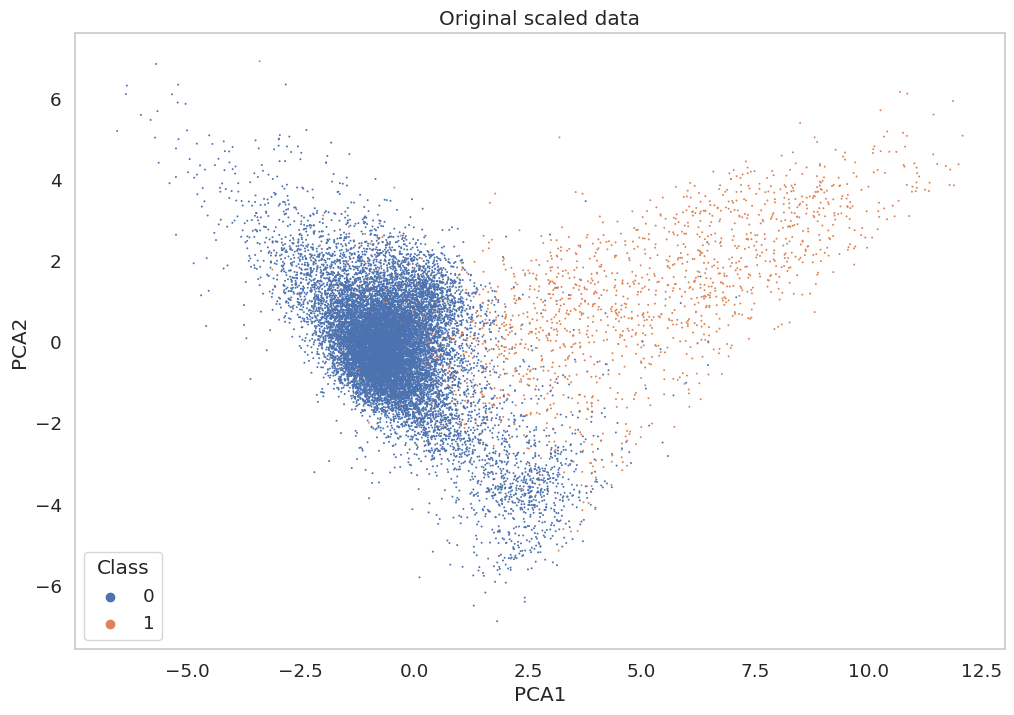

In [ ]:
plt.figure(figsize = (12, 8))
sns.scatterplot(data = pca2, x = "PCA1", y = "PCA2", s = 2, hue = "Class",
                linewidth = 0)
plt.grid(False)
plt.title("Original scaled data")
plt.show()

# **DENSITY CLUSTERING BASED OVERSAMPLING**

In [ ]:
def oversampling(X, y, dupSize=1, MinPts=None, eps=None):
    # Step 1: Cluster the minority class samples using DBSCAN
    db = DBSCAN(eps=eps, min_samples=MinPts)
    db.fit(X[y == 1])

    # DataFrame to store synthetic samples
    syn_dat = pd.DataFrame()

    # Step 2: Generate synthetic samples for each dense cluster of minority class
    for cluster_label in np.unique(db.labels_):
        if cluster_label == -1:
            continue  # Skip noise points

        # Extract samples belonging to the current cluster
        cluster_indices = np.where(db.labels_ == cluster_label)[0]

        # Compute pairwise distances between samples in the cluster
        dist_matrix = pairwise_distances(X.iloc[cluster_indices])

        # Compute the density of each sample (number of neighbors within eps)
        density = np.sum(dist_matrix <= eps, axis=1)

        # Generate synthetic samples
        for i, idx in enumerate(cluster_indices):
            # Find neighboring minority class samples with higher density
            minority_neighbors = np.where((dist_matrix[i] <= eps) & (y.iloc[cluster_indices] == 1) & (density > density[i]))[0]
            if len(minority_neighbors) == 0:
                continue  # Skip if no high-density minority class neighbors found

            # Randomly select neighboring samples and generate synthetic samples
            for _ in range(dupSize):
                neighbor_idx = np.random.choice(minority_neighbors)

                # Generate synthetic sample by interpolating between sample and neighbor
                alpha = np.random.random()  # Interpolation factor
                syn_sample = X.iloc[idx] + alpha * (X.iloc[neighbor_idx] - X.iloc[idx])

                # Append synthetic sample to DataFrame
                syn_dat = pd.concat([syn_dat, pd.DataFrame(syn_sample).T])

    # Step 3: Combine original and synthetic samples
    combined_df = pd.concat([X, syn_dat], axis=0)
    combined_df['target'] = np.concatenate([y, np.ones(len(syn_dat))], axis=0)

    return combined_df

In [ ]:
X = df.drop('Class', axis=1)
y = df['Class']

oversampled_df = oversampling(X, y, dupSize= 100, MinPts=8, eps= 10)
oversampled_df.shape

(25296, 9)

In [ ]:
oversampled_df['target'].value_counts()

target
0.0    16259
1.0     9037
Name: count, dtype: int64

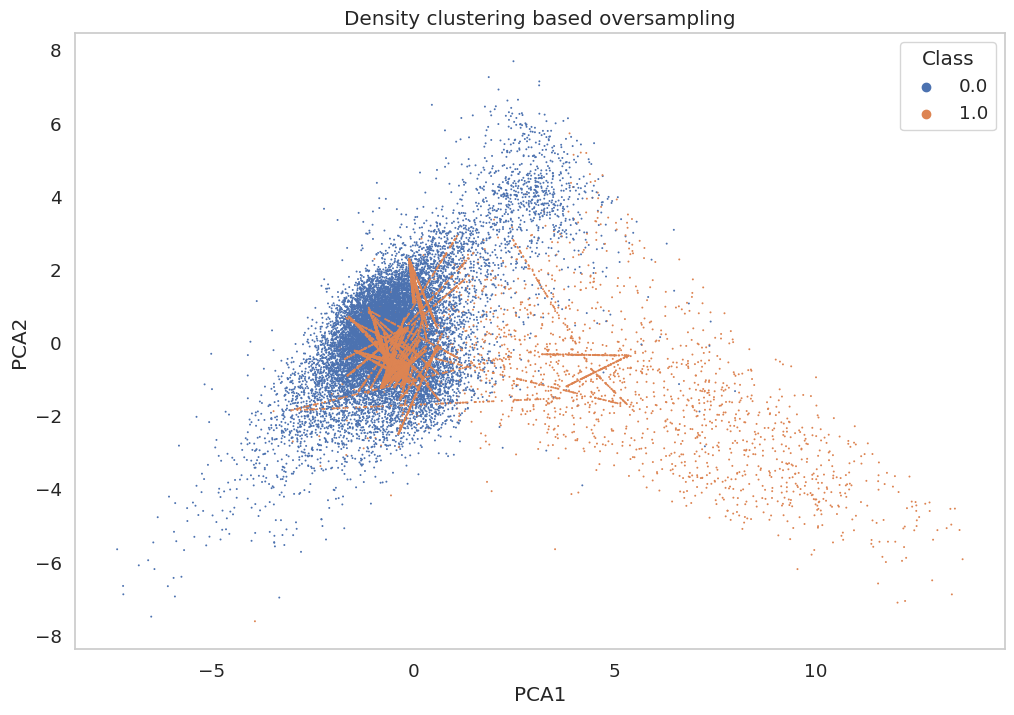

In [ ]:
# n = 2
pca = PCA(2)
ss = StandardScaler()

X = oversampled_df.drop('target', axis = 1)
X_ss = pd.DataFrame(ss.fit_transform(X))
X_pca = pca.fit_transform(X_ss)
pca2 = pd.DataFrame({"PCA1": X_pca[:, 0], "PCA2": X_pca[:, 1], "Class": oversampled_df["target"]})
plt.figure(figsize = (12, 8))
sns.scatterplot(data = pca2, x = "PCA1", y = "PCA2", s = 2, hue = "Class",linewidth = 0)
plt.grid(False)
plt.title("Density clustering based oversampling")
plt.show()

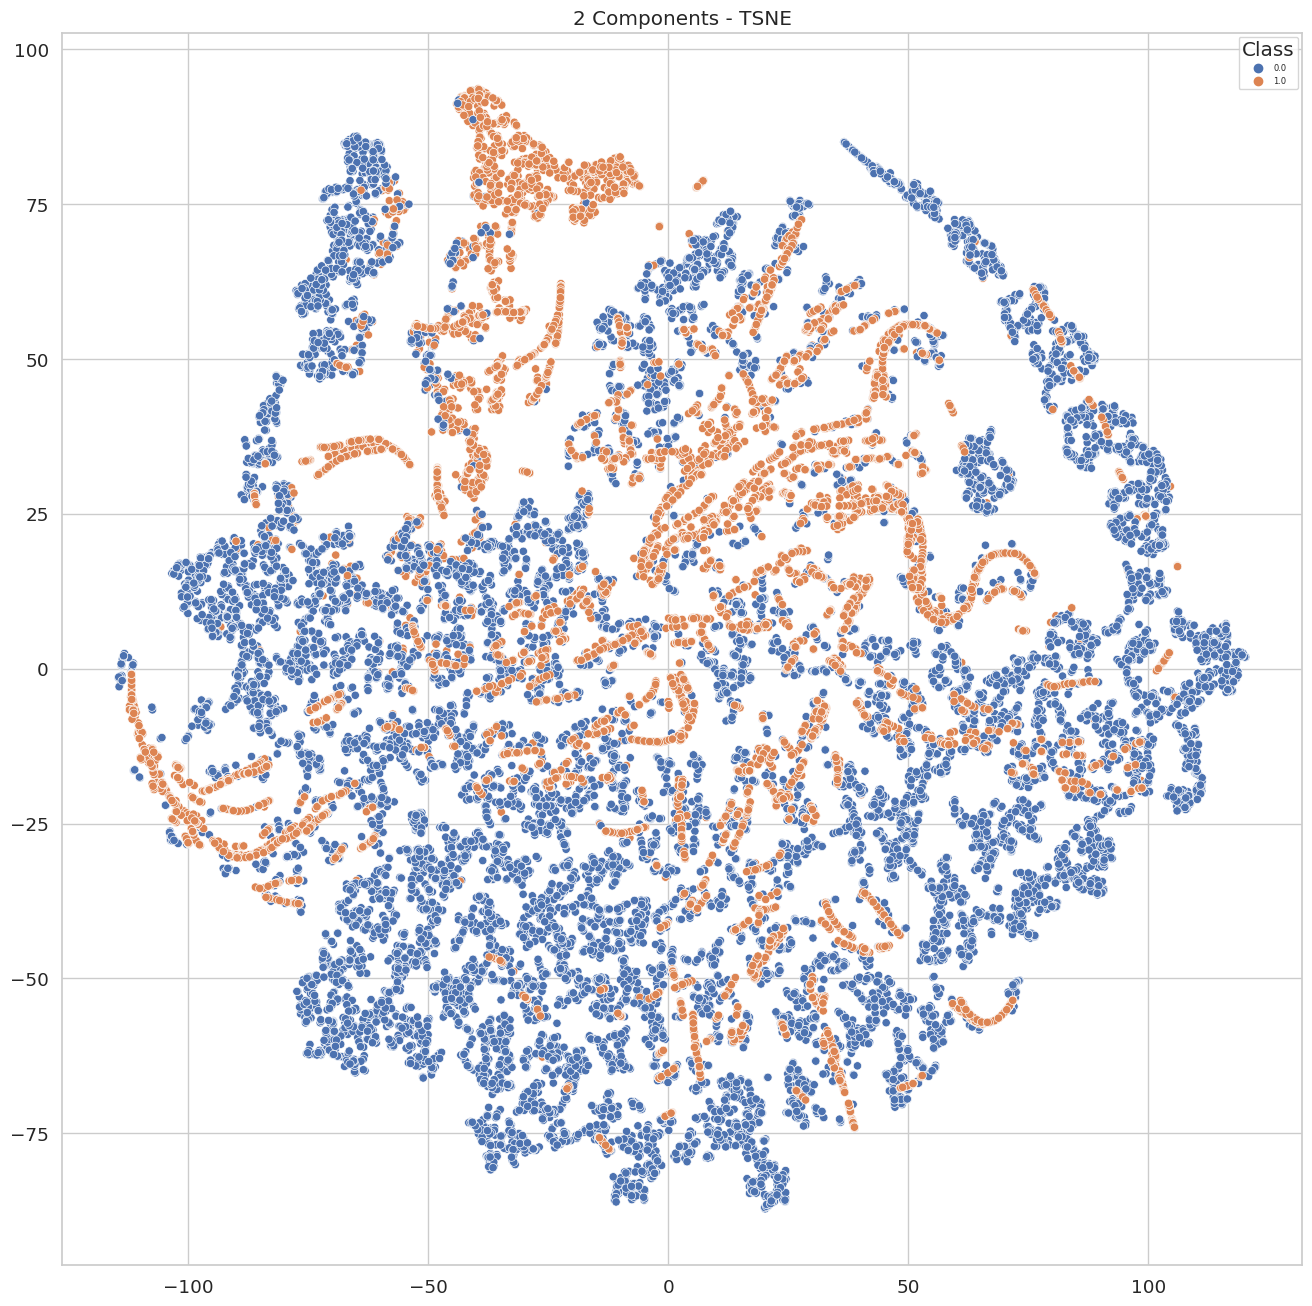

In [ ]:
target = oversampled_df['target']
tsne = TSNE()
train_tsne = tsne.fit(oversampled_df.to_numpy())
fig, ax = plt.subplots(figsize=(16, 16))
sns.scatterplot(x=train_tsne[:, 0], y=train_tsne[:, 1], hue=target, ax=ax)
ax.legend(fontsize=6, title='Class')
ax.set_title('2 Components - TSNE');

# **UNDERSAMPLING USING AllKNN (repetative ENN algorithm)**

In [ ]:
X = df.drop(columns=['Class'])
y = df['Class']

# AllKNN sampler
allknn_sampler = AllKNN(n_neighbors=8)
X_undersampled, y_undersampled = allknn_sampler.fit_resample(X, y)

# Concatenate the undersampled data into a DataFrame
undersampled_df = pd.concat([pd.DataFrame(X_undersampled, columns=X.columns), pd.Series(y_undersampled, name='target')], axis=1)
undersampled_df.shape

(15677, 9)

In [ ]:
undersampled_df['target'].value_counts()

target
0    14040
1     1637
Name: count, dtype: int64

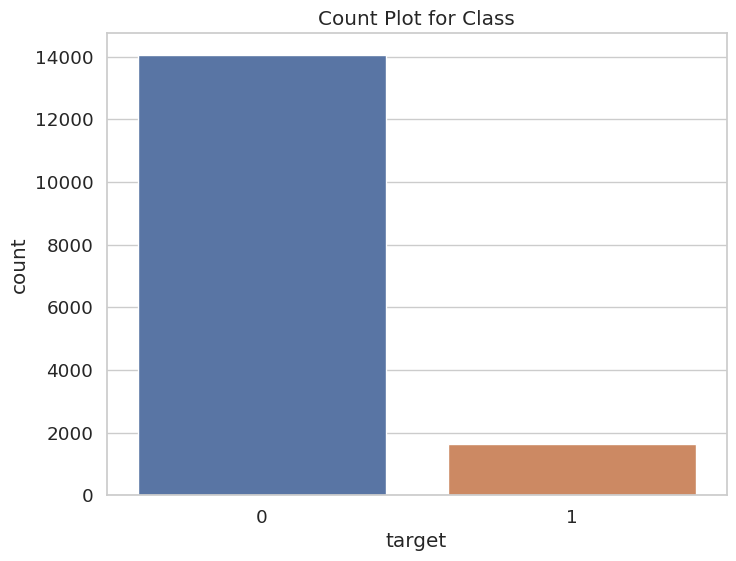

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=undersampled_df, x='target')
plt.title('Count Plot for Class')
plt.show()

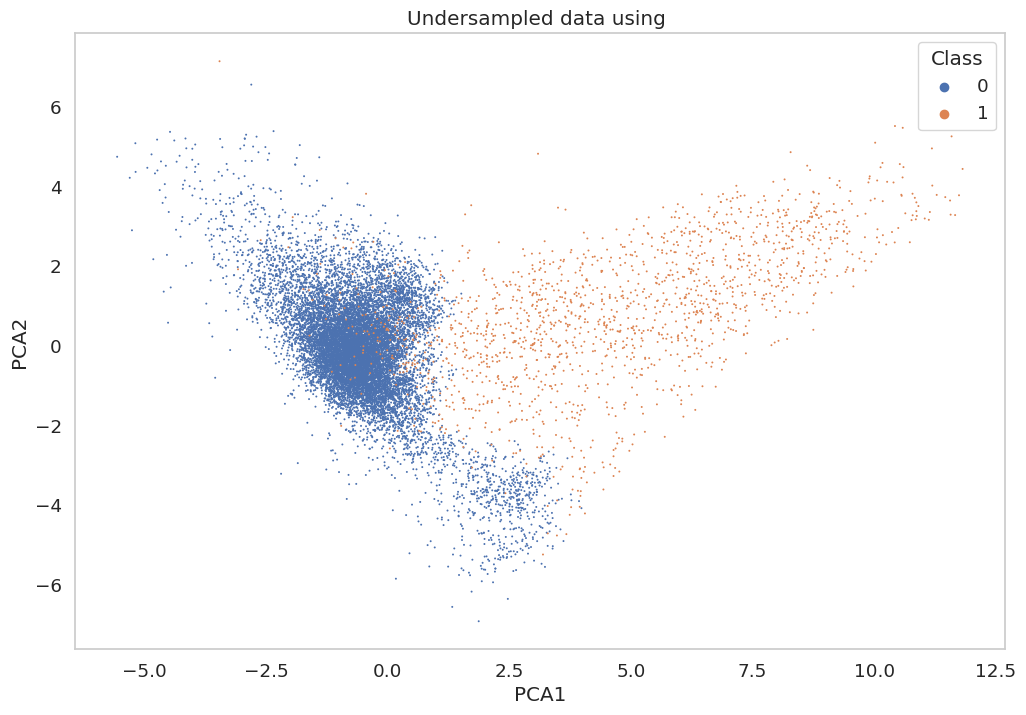

In [ ]:
# n = 2
pca = PCA(2)
ss = StandardScaler()

X = undersampled_df.drop('target', axis = 1)
X_ss = pd.DataFrame(ss.fit_transform(X))
X_pca = pca.fit_transform(X_ss)
pca2 = pd.DataFrame({"PCA1": X_pca[:, 0], "PCA2": X_pca[:, 1], "Class": undersampled_df["target"]})
plt.figure(figsize = (12, 8))
sns.scatterplot(data = pca2, x = "PCA1", y = "PCA2", s = 2, hue = "Class",linewidth = 0)
plt.grid(False)
plt.title("Undersampled data using ")
plt.show()

# **DENSITY CLUSTERING BASED UNDERSAMPLING**

In [ ]:
def density_based_undersampling(data, cluster_size=200, eps=0.5, min_samples=5):
    # Separate majority and minority class instances
    majority_class = data[data['Class'] == 0]
    minority_class = data[data['Class'] == 1]

    # Use DBSCAN to cluster majority class instances
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    majority_class_features = majority_class.drop('Class', axis=1)
    dbscan.fit(majority_class_features)

    # Get the cluster labels
    cluster_labels = dbscan.labels_

    # Get the indices of majority class instances belonging to noise points and each cluster
    noise_indices = np.where(cluster_labels == -1)[0]
    cluster_indices = [np.where(cluster_labels == label)[0] for label in np.unique(cluster_labels) if label != -1]

    # Initialize undersampled data
    undersampled_data = minority_class.copy()

    # Loop through each cluster
    for indices in cluster_indices:
        if len(indices) <= cluster_size:
            # If the cluster size is smaller than or equal to the desired size, keep all instances
            selected_indices = indices
        else:
            # If the cluster size is larger than the desired size, randomly select instances
            selected_indices = np.random.choice(indices, size=cluster_size, replace=False)

        # Add selected instances to undersampled data
        undersampled_data = pd.concat([undersampled_data, majority_class.iloc[selected_indices]], ignore_index=True)

    # Add noise points to undersampled data
    undersampled_data = pd.concat([undersampled_data, majority_class.iloc[noise_indices]], ignore_index=True)

    return undersampled_data

In [ ]:
X = df.drop('Class', axis=1)
y = df['Class']

# 3. Call the dbsmote function
res = density_based_undersampling(df, cluster_size=150, eps=8, min_samples=250)
res.shape

(15174, 9)

In [ ]:
res['Class'].value_counts()

Class
0    13537
1     1637
Name: count, dtype: int64

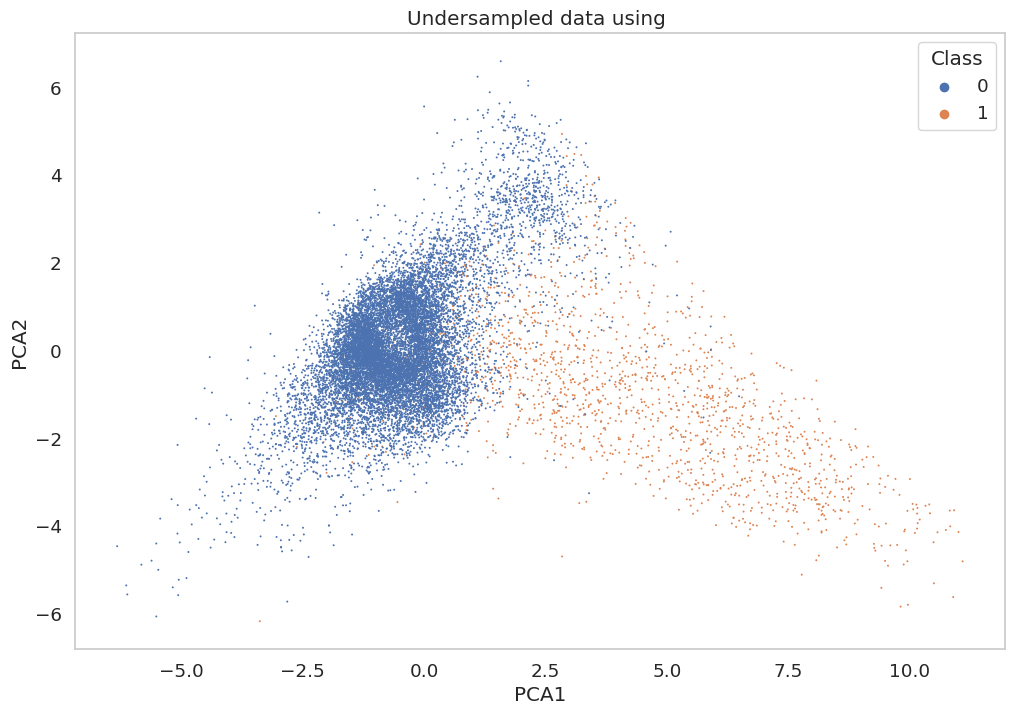

In [ ]:
# n = 2
pca = PCA(2)
ss = StandardScaler()

X = res.drop('Class', axis = 1)
X_ss = pd.DataFrame(ss.fit_transform(X))
X_pca = pca.fit_transform(X_ss)
pca2 = pd.DataFrame({"PCA1": X_pca[:, 0], "PCA2": X_pca[:, 1], "Class": res["Class"]})
plt.figure(figsize = (12, 8))
sns.scatterplot(data = pca2, x = "PCA1", y = "PCA2", s = 2, hue = "Class",linewidth = 0)
plt.grid(False)
plt.title("Undersampled data using ")
plt.show()

**Feature Engineering**

In [ ]:
def fe(df):
    df['EK * EK_DMSNR_Curve'] = df.eval('EK * EK_DMSNR_Curve')
    df['EK * SD_DMSNR_Curve'] = df.eval('EK * SD_DMSNR_Curve')
    return df

# **Training the base models**

In [ ]:
original_df = fe(df)

X = original_df.drop('Class', axis=1)
y = original_df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

original = RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_split=2, min_samples_leaf=1)
original.fit(X_train, y_train)

original_pred = original.predict(X_test)

accuracy = accuracy_score(y_test, original_pred)
classification_rep = classification_report(y_test, original_pred)
conf_matrix = confusion_matrix(y_test, original_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.9807778274474743
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      4075
           1       0.93      0.84      0.89       399

    accuracy                           0.98      4474
   macro avg       0.96      0.92      0.94      4474
weighted avg       0.98      0.98      0.98      4474

Confusion Matrix:
 [[4051   24]
 [  62  337]]


In [ ]:
undersampled_df = fe(undersampled_df)

X = undersampled_df.drop('target', axis=1)
y = undersampled_df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

undersampled_rf = RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_split=2, min_samples_leaf=1)
undersampled_rf.fit(X_train, y_train)

undersampled_pred = undersampled_rf.predict(X_test)

accuracy = accuracy_score(y_test, undersampled_pred)
classification_rep = classification_report(y_test,undersampled_pred)
conf_matrix = confusion_matrix(y_test,undersampled_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.9897959183673469
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      3511
           1       0.98      0.92      0.95       409

    accuracy                           0.99      3920
   macro avg       0.99      0.96      0.97      3920
weighted avg       0.99      0.99      0.99      3920

Confusion Matrix:
 [[3505    6]
 [  34  375]]


In [ ]:
oversampled_df = fe(oversampled_df)

X = oversampled_df.drop('target', axis=1)
y = oversampled_df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

oversampled_rf = RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_split=2, min_samples_leaf=1)
oversampled_rf.fit(X_train, y_train)

oversampled_pred = oversampled_rf.predict(X_test)

accuracy = accuracy_score(y_test, oversampled_pred)
classification_rep = classification_report(y_test,oversampled_pred)
conf_matrix = confusion_matrix(y_test,oversampled_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.9750158127767236
Classification Report:
               precision    recall  f1-score   support

         0.0       0.98      0.98      0.98      4066
         1.0       0.97      0.96      0.96      2258

    accuracy                           0.98      6324
   macro avg       0.97      0.97      0.97      6324
weighted avg       0.97      0.98      0.97      6324

Confusion Matrix:
 [[3995   71]
 [  87 2171]]


In [ ]:
db_undersampled_df = fe(res)

X = db_undersampled_df.drop('Class', axis=1)
y = db_undersampled_df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

db_undersampled_rf = RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_split=2, min_samples_leaf=1)
db_undersampled_rf.fit(X_train, y_train)

db_undersampled_pred = undersampled_rf.predict(X_test)

accuracy = accuracy_score(y_test, db_undersampled_pred)
classification_rep = classification_report(y_test,db_undersampled_pred)
conf_matrix = confusion_matrix(y_test,db_undersampled_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.9754876120189774
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99      3375
           1       0.83      0.98      0.90       419

    accuracy                           0.98      3794
   macro avg       0.91      0.98      0.94      3794
weighted avg       0.98      0.98      0.98      3794

Confusion Matrix:
 [[3290   85]
 [   8  411]]


In [ ]:
df = fe(df)
X = df.drop('Class', axis=1)
y = df['Class']

config = {'SEED': 42,
          'FOLDS': 15,
          'N_ESTIMATORS': 700}

params = {'max_depth': 4,
          'learning_rate': 0.06,
          'colsample_bytree': 0.67,
          'n_jobs': -1,
          'objective': 'binary:logistic',
          'verbosity': 0,
          'eval_metric': 'logloss'}

# Create a StratifiedKFold cross-validator
cv = StratifiedKFold(n_splits=config['FOLDS'], shuffle=True, random_state=config['SEED'])

# Initialize an empty list to store models and accuracies
models = []
accuracies = []

# Iterate over each fold
for fold, (train_idx, val_idx) in enumerate(cv.split(X, y)):
    X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

    # Initialize and train XGBoost classifier
    xgb_classifier = XGBClassifier(**params, n_estimators=config['N_ESTIMATORS'], early_stopping_rounds=None)
    xgb_classifier.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose=False)

    # Make predictions on the validation set
    val_preds = xgb_classifier.predict_proba(X_val)[:, 1]
    val_pred_labels = (val_preds > 0.5).astype(int)

    # Compute accuracy
    accuracy = accuracy_score(y_val, val_pred_labels)
    accuracies.append(accuracy)

    # Print evaluation metrics for this fold
    print("-----------------------------------------")
    print(f'Fold {fold+1} - Accuracy: {accuracy:.5f}')

    # Store the trained model
    models.append(xgb_classifier)

# Average accuracy across folds
average_accuracy = np.mean(accuracies)
print(f'Average Accuracy across {config["FOLDS"]} folds: {average_accuracy:.5f}')

-----------------------------------------
Fold 1 - Accuracy: 0.98911
-----------------------------------------
Fold 2 - Accuracy: 0.97653
-----------------------------------------
Fold 3 - Accuracy: 0.97485
-----------------------------------------
Fold 4 - Accuracy: 0.98156
-----------------------------------------
Fold 5 - Accuracy: 0.97569
-----------------------------------------
Fold 6 - Accuracy: 0.98072
-----------------------------------------
Fold 7 - Accuracy: 0.98407
-----------------------------------------
Fold 8 - Accuracy: 0.97904
-----------------------------------------
Fold 9 - Accuracy: 0.97988
-----------------------------------------
Fold 10 - Accuracy: 0.97234
-----------------------------------------
Fold 11 - Accuracy: 0.97737
-----------------------------------------
Fold 12 - Accuracy: 0.98240
-----------------------------------------
Fold 13 - Accuracy: 0.98156
-----------------------------------------
Fold 14 - Accuracy: 0.98324
-----------------------------

In [ ]:
X = original_df.drop('Class', axis=1)
y = original_df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

best_model_idx = np.argmax(accuracies)
best_xgb = models[best_model_idx]

xgb_pred = best_xgb.predict(X_test)

accuracy = accuracy_score(y_test, xgb_pred)
classification_rep = classification_report(y_test, xgb_pred)
conf_matrix = confusion_matrix(y_test, xgb_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.9917299955297273
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00      4075
           1       0.98      0.92      0.95       399

    accuracy                           0.99      4474
   macro avg       0.99      0.96      0.97      4474
weighted avg       0.99      0.99      0.99      4474

Confusion Matrix:
 [[4069    6]
 [  31  368]]


In [ ]:
weights = [1,1,2,3,3]
sum_weights = sum(weights)
normalized_weights = [w / sum_weights for w in weights]

# Define the voting classifier
voting_classifier = VotingClassifier(
    estimators=[
        ('density_oversampled',oversampled_rf),
        ('density_undersampled',db_undersampled_rf),
        ('original', original),
        ('xgb',best_xgb),
        ('AllKNN', undersampled_rf)
    ],
    voting='hard',
    weights=normalized_weights
)

voting_classifier.fit(X_train, y_train)
predictions = voting_classifier.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print("Ensemble accuracy:", accuracy)

Ensemble accuracy: 0.9814483683504693


**We have the ensemble ready with a validation accuracy of 98.12%**

# **TESTING**

**Test Dataset Description**
The test data has been taken from 'PLAYGROUND PREDICTION COMPETITION'in kaggle where the competition was hosted as "Binary Classification with a Tabular Pulsar Dataset
Playground Series - Season 3, Episode 10". The dataset for this competition (both train and test) was generated from a deep learning model trained on the Pulsar Classification( the data we have used to train our ensemble). Feature distributions are close to, but not exactly the same, as the original.

Files
train.csv - the training dataset; Class is the (binary) target
test.csv - the test dataset; your objective is to predict the probability of Class (whether the observation is a pulsar)
sample_submission.csv - a sample submission file in the correct format

We will use the train.csv of this competition as our test data and validate the results with the class labels available. This is to ensure that there is no information leakage which results in high validation accuracy. We will also test our ensemble model on different propotions of imbalnace and evalute it appropriately.

In [ ]:
test = pd.read_csv("/kaggle/input/playground-series-s3e10/train.csv")
test = test.drop('id',axis =1)
test.head()

Mean_Integrated         SD        EK  Skewness  Mean_DMSNR_Curve  \
0       133.171875  59.716081  0.043133 -0.703383         54.917224   
1        87.093750  36.257973  0.435469  2.266057          3.417224   
2       112.640625  39.818393  0.379639  0.922306          2.730769   
3       120.679688  45.918448 -0.098490  0.011775          2.696488   
4       134.070312  57.720107 -0.107772 -0.573335          1.107860   

   SD_DMSNR_Curve  EK_DMSNR_Curve  Skewness_DMSNR_Curve  Class  
0       70.084438        0.749798             -0.649512      0  
1       21.865069        7.039330             52.686251      0  
2       15.689690        8.193471             85.649785      0  
3       20.954662        8.183874             70.332899      0  
4       11.255051       16.107748            308.753765      0

In [ ]:
test.describe()

Mean_Integrated             SD             EK       Skewness  \
count    117564.000000  117564.000000  117564.000000  117564.000000   
mean        111.248300      46.713535       0.503498       1.886385   
std          24.906474       6.102941       1.127093       6.515466   
min           6.054688      24.783273      -1.730782      -1.791886   
25%         104.546875      43.443390       0.049761      -0.188956   
50%         116.664062      47.478932       0.186498       0.091720   
75%         126.296875      50.862718       0.395620       0.691613   
max         189.367188      93.602933       7.879628      65.385974   

       Mean_DMSNR_Curve  SD_DMSNR_Curve  EK_DMSNR_Curve  Skewness_DMSNR_Curve  \
count     117564.000000   117564.000000   117564.000000         117564.000000   
mean          11.962921       26.190678        8.037488             93.881076   
std           26.719946       20.041937        3.840980             79.962110   
min            0.213211        7.370432       -2.597872             -1.976976   
25%            2.090301       14.955405        6.742911             49.409136   
50%            2.808528       18.164924        8.442883             83.421375   
75%            4.122910       24.732218       10.003237            122.093290   
max          217.371238      109.890785       34.539844           1191.000837   

               Class  
count  117564.000000  
mean        0.093285  
std         0.290833  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.000000

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117564 entries, 0 to 117563
Data columns (total 9 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Mean_Integrated       117564 non-null  float64
 1   SD                    117564 non-null  float64
 2   EK                    117564 non-null  float64
 3   Skewness              117564 non-null  float64
 4   Mean_DMSNR_Curve      117564 non-null  float64
 5   SD_DMSNR_Curve        117564 non-null  float64
 6   EK_DMSNR_Curve        117564 non-null  float64
 7   Skewness_DMSNR_Curve  117564 non-null  float64
 8   Class                 117564 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 8.1 MB


In [ ]:
test.shape

(117564, 9)

We will now create two samples of data. One with 1:10 imbalance and the other one with 1:20 imbalance.

**1:10 Sample**

In [ ]:
total_samples = 1500
majority_samples = int(total_samples * 10 / 11)  # 1:10 proportion for majority class
minority_samples = total_samples - majority_samples

majority_data = test[test['Class'] == 0]
minority_data = test[test['Class'] == 1]

majority_sampled = majority_data.sample(n=majority_samples, replace=True)
minority_sampled = minority_data.sample(n=minority_samples, replace=True)

sampled_data = pd.concat([majority_sampled, minority_sampled], ignore_index=True)

# Shuffle the sampled data
sampled_10 = sampled_data.sample(frac=1).reset_index(drop=True)
sampled_10['Class'].value_counts()

Class
0    1363
1     137
Name: count, dtype: int64

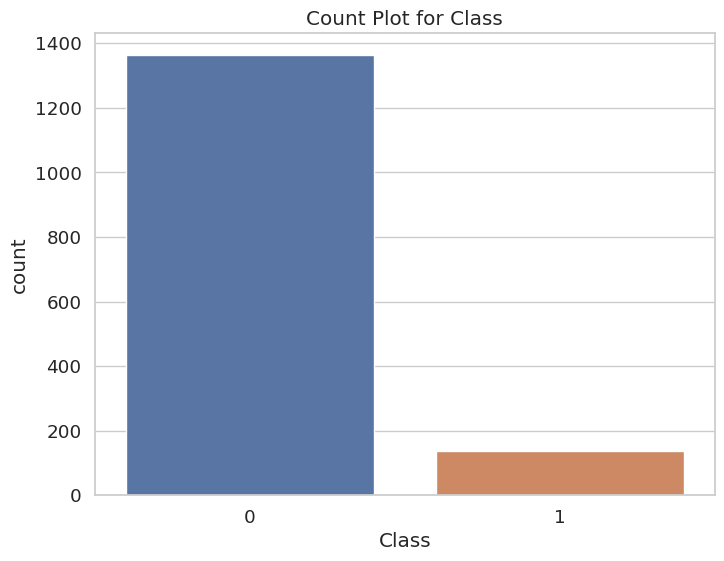

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=sampled_10, x='Class')
plt.title('Count Plot for Class')
plt.show()

In [ ]:
sampled_10 = fe(sampled_10 )
X = sampled_10.drop('Class',axis=1)
predictions_10 = voting_classifier.predict(X)

accuracy_10 = accuracy_score(sampled_10['Class'], predictions_10)
classification_rep_10 = classification_report(sampled_10['Class'],predictions_10)
conf_matrix_10 = confusion_matrix(sampled_10['Class'],predictions_10)

print("Accuracy:", accuracy_10)
print("Classification Report:\n", classification_rep_10)
print("Confusion Matrix:\n", conf_matrix_10)

Accuracy: 0.99
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      1363
           1       0.96      0.93      0.94       137

    accuracy                           0.99      1500
   macro avg       0.98      0.96      0.97      1500
weighted avg       0.99      0.99      0.99      1500

Confusion Matrix:
 [[1358    5]
 [  10  127]]


**1:20 Sample**

In [ ]:
total_samples = 1500
majority_samples = int(total_samples * 20 / 21)  # 1:20 proportion for majority class
minority_samples = total_samples - majority_samples

majority_data = test[test['Class'] == 0]
minority_data = test[test['Class'] == 1]

majority_sampled = majority_data.sample(n=majority_samples, replace=True)
minority_sampled = minority_data.sample(n=minority_samples, replace=True)

sampled_data = pd.concat([majority_sampled, minority_sampled], ignore_index=True)

sampled_20 = sampled_data.sample(frac=1).reset_index(drop=True)
sampled_20['Class'].value_counts()

Class
0    1428
1      72
Name: count, dtype: int64

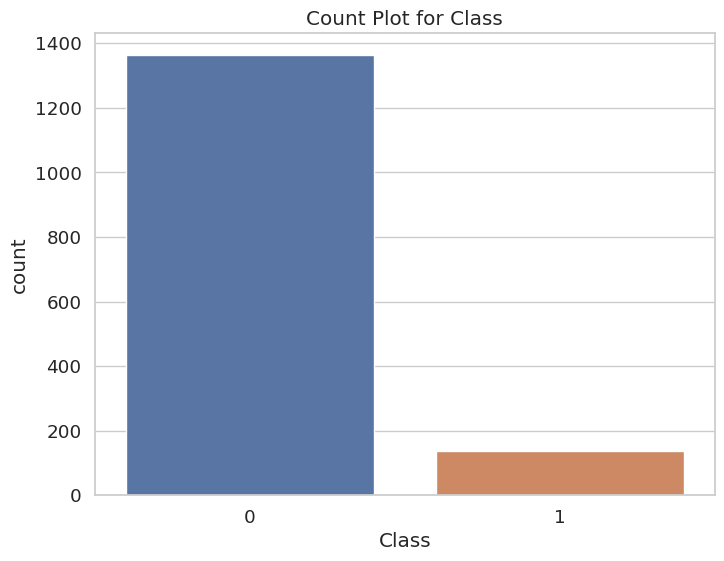

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=sampled_10, x='Class')
plt.title('Count Plot for Class')
plt.show()

In [ ]:
sampled_20 = fe(sampled_20 )
X_20 = sampled_20.drop('Class',axis=1)
y = sampled_20['Class']
predictions_20 = voting_classifier.predict(X)

accuracy_20 = accuracy_score(sampled_20['Class'], predictions_20)
classification_rep_20 = classification_report(sampled_20['Class'],predictions_20)
conf_matrix_20 = confusion_matrix(sampled_20['Class'],predictions_20)

print("Accuracy:", accuracy_20)
print("Classification Report:\n", classification_rep_20)
print("Confusion Matrix:\n", conf_matrix_20)

Accuracy: 0.8693333333333333
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.91      0.93      1428
           1       0.03      0.06      0.04        72

    accuracy                           0.87      1500
   macro avg       0.49      0.48      0.48      1500
weighted avg       0.91      0.87      0.89      1500

Confusion Matrix:
 [[1300  128]
 [  68    4]]


# **CONCLUSION**

We have implemented DBSCAN clustering-based resampling techniques on which we have trained base learners to produce a robust ensemble of decision trees which are sensitive to imbalance. Such an ensemble does not entirely impact the structure of the original data, as models trained on the augmented data used are in tandem with the model trained with the original data.

We have further explored how we can create decision boundaries for a random forest meta-classifier which is trained on the predictions of two random forests

    1) random forest trained on the original data
    
    2) random forest trained on instances created using the boundary and density domain.
       (The boundary and density domian we create using DBSCAN is similar to what we did in
       our resampling i.e,density based undersampling and density based oversampling).
       
This proves to give better results in overlapped scenarios.However,this is not included in this notebook because it was not suitable for our dataset.The approach remains similar.

Finally, in the testing of our ensemble, we have considered severly imbalanced samples of a completely isolated data. Our results were satisfactory.

1) For 1:20 imbalance ratio we got 8 correctly classified minority instances out of 64    instances

2)For the 1:10 sample we yeild 13 misclassfied instances out of 137 which means we got 124 correctly classified minority instances.

However,although the accuracy for 1:20 imbalance is high comparitively, evaluating it on the ROC curve we see that it behaves as a random classifier at such extreme imbalances.

**1:10**

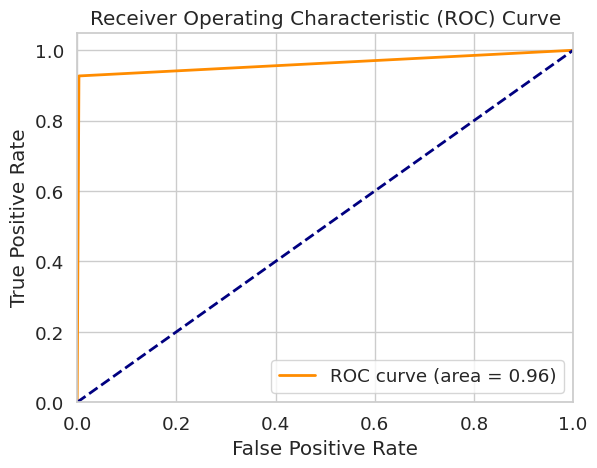

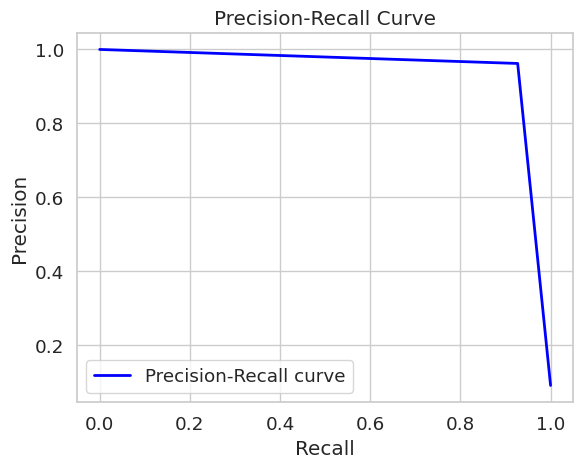

In [ ]:
# Assuming 'y_test' contains the true labels and 'predictions' contains the predicted probabilities or scores

# Calculate ROC curve
fpr, tpr, _ = roc_curve(sampled_10['Class'], predictions_10)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Calculate Precision-Recall curve
precision, recall, _ = precision_recall_curve(sampled_10['Class'], predictions_10)

# Plot Precision-Recall curve
plt.figure()
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()

**1:20**

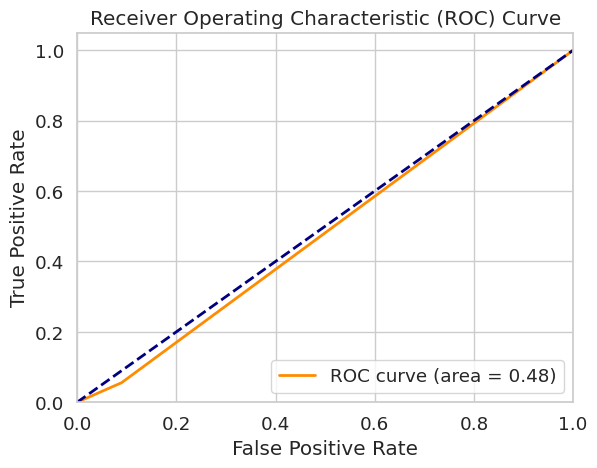

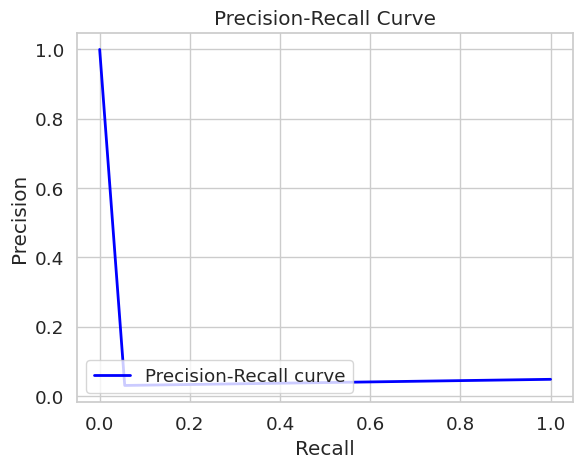

In [ ]:
# Assuming 'y_test' contains the true labels and 'predictions' contains the predicted probabilities or scores

# Calculate ROC curve
fpr, tpr, _ = roc_curve(y, predictions_20)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Calculate Precision-Recall curve
precision, recall, _ = precision_recall_curve(y, predictions_20)

# Plot Precision-Recall curve
plt.figure()
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()